In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/서비스기획.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,솔루션 및 프로젝트 기획 콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의...,해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분 수단...
1,디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 ...,데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또...
2,성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application...,3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설...
3,서비스 기획모바일 서비스 인투펫 앱 서비스 기획IA 서비스 정책 수립 요구사항 정의...,학력 대졸이상경력 310년IT 서비스 기획 3년 이상사용자 관점에서 문제를 발견...
4,VitalCare 서비스 기획 웹 UIUX설계 시스템 구축에 대한 요구사항 분석 ...,웹 서비스 기획 및 운영 5년 이상 경력 유저 스토리 기반의 요구사항을 기반으로 ...
...,...,...
218,프로젝트 매니징 업무 자사 서비스웹모바일 신규 기획 및 개선 데이터 분석 경쟁사 ...,웹모바일 기획 경력 5년 이상 PM 경력 보유자 B2C 플랫폼 경험 포트폴리오 제...
219,더즌의 금융 솔루션 이용자B2B를 대상으로 한 admin 및 back office...,Back office 화면 기획 Admin기획 경력 보유 이용자에게 최적화된 UI...
220,글로벌 치과업체 및 랩과의 커뮤니케이션 진행비즈니스 마케팅 기술 협업 관련 논의 ...,영어 능통자 사업 및 파트너십 업무 경력 1년 이상 해외출장에 결격사유가 없는 자...
221,직무개요신규 3세대 블록체인 기반의 분산 애플리케이션dApp 서비스 기획과 전략을...,유관 경력 5년 이상 학력 무관해외 커뮤니티 활동 지원을 위한 영어회화


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,솔루션 및 프로젝트 기획 콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의...
1,디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 ...
2,성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application...
3,서비스 기획모바일 서비스 인투펫 앱 서비스 기획IA 서비스 정책 수립 요구사항 정의...
4,VitalCare 서비스 기획 웹 UIUX설계 시스템 구축에 대한 요구사항 분석 ...
...,...
218,프로젝트 매니징 업무 자사 서비스웹모바일 신규 기획 및 개선 데이터 분석 경쟁사 ...
219,더즌의 금융 솔루션 이용자B2B를 대상으로 한 admin 및 back office...
220,글로벌 치과업체 및 랩과의 커뮤니케이션 진행비즈니스 마케팅 기술 협업 관련 논의 ...
221,직무개요신규 3세대 블록체인 기반의 분산 애플리케이션dApp 서비스 기획과 전략을...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/서비스기획(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 솔루션 및 프로젝트 기획  콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의  초기 기획을 위해 구현하고자 하는 기술을 분석하고 고도화를 위한 방안 모색  기획한 바에 대한 일정 및 로드맵 수립 및 고도화 과정 전반 관여\n 디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 개발 자사 솔루션과 서비스의 Value를 고객에게 전파\n성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application을 가장 빠르게 변하는 산업에서 대응하는 스킬을 향상시켜 추후 어떤 프로덕트를 기획하더라도 느리게 움직이는 효과를 체감할 수 있습니다둘 거래소는 글로벌 금융경제와 밀접하게 관련 있는 서비스이기 때문에 금융지식이 포괄적으로 상승합니다셋 Web3 생태계에서 기획자의 경험을 쌓을 수 있습니다 Web3가 미개척 산업인만큼 국내 Web3 기획자가 희귀하고 실력있는 Web3 기획자는 세계적으로도 희귀합니다넷 빈번하게 Web3 event를 스폰하고 있고 적극적으로 네트워킹하고 있습니다 정기적으로 열리는 KBW Upbit conference와 같은 Web3 행사 참여를 적극 권하고 있기 때문에 자신만의 네트워크 형성하기 좋은 환경입니다다섯 Web3 산업 특성상 고객파트너VC 모두 해외사입니다 자유롭게 해외사와 교류 할 수 있고 추후 해외 회사에서 일하고 싶다면 VC와 연결하여 Web3 해외사를 경험해 볼 수 있습니다 추후 두바이 진출도 염두해두고 있어 선택적으로 국내잔류 혹은 해외진출을 선택할 수 있습니다여섯 Web3는 타산업보다 빠르게 프로덕트 0to1을 만들 수 있습니다 스타트업 프로덕트의 모든 과정을 컴팩트하게 경험하면서 어느 단계에서 어떤 문제들이 생기고 어떻게 해결하고 어떻게 협업하는지 전체적으로 경험할 수 있습니다이런 일을 해요 개발 디자인 사업 마케팅 팀들을 매니징하며 크립토 거래소DEX Web3 기반 서비스를 기획운영합니다 가설검증 사이클들을 운영하며 핵심 피쳐들을 정의합니다 일단위 유저인터뷰를 통해 

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '솔루션',
 '및',
 '프로젝트',
 '기획',
 '콘셉트',
 '외부',
 '문제',
 '요구',
 '사항',
 '기능',
 '등',
 '정의',
 '초기',
 '기획',
 '위해',
 '구현',
 '기술',
 '분석',
 '고도화',
 '위',
 '방안',
 '모색',
 '기획',
 '바',
 '대한',
 '일정',
 '및',
 '로드맵',
 '수립',
 '및',
 '고도화',
 '과정',
 '전반',
 '관여',
 '디지털',
 '광고',
 '상품',
 '등',
 '전략',
 '수립',
 '및',
 '기획',
 '고객',
 '행동',
 '데이터',
 '분석',
 '및',
 '분석',
 '서비스',
 '개발',
 '자사',
 '솔루션',
 '서비스',
 '를',
 '고객',
 '전파',
 '성장',
 '포인트',
 '대해',
 '하나',
 '기획',
 '로서',
 '거래소',
 '가장',
 '산업',
 '대응',
 '스킬',
 '향상',
 '추후',
 '프로덕트',
 '기획',
 '효과',
 '체감',
 '수',
 '둘',
 '거래소',
 '글로벌',
 '금융',
 '경제',
 '관련',
 '서비스',
 '이기',
 '때문',
 '금융',
 '지식',
 '포괄',
 '상승',
 '셋',
 '생태계',
 '기획',
 '자의',
 '경험',
 '수',
 '미개척',
 '산업',
 '국내',
 '기획',
 '희귀',
 '실력',
 '기획',
 '세계',
 '희귀',
 '넷',
 '빈번',
 '를',
 '스폰',
 '적극',
 '네트워킹',
 '정기',
 '행사',
 '참여',
 '적극',
 '때문',
 '자신',
 '네트워크',
 '형성',
 '환경',
 '산업',
 '특성',
 '고객',
 '파트너',
 '모두',
 '해외',
 '사',
 '해외',
 '교류',
 '수',
 '추후',
 '해외',
 '회사',
 '일',
 '해외',
 '경험',
 '볼',
 '수',
 '추후',
 '두바이',
 '진출',
 '염두',
 '선택',


In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

8840
1080


FreqDist({'및': 575, '기획': 411, '서비스': 370, '운영': 188, '관리': 184, '분석': 151, '개발': 134, '등': 115, '수립': 107, '개선': 104, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '서비스','사','실행','수립','사요','작성','문제','우수','능력','관련','이상','기반','비즈니스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '솔루션',
 '프로젝트',
 '기획',
 '콘셉트',
 '외부',
 '요구',
 '사항',
 '기능',
 '정의',
 '초기',
 '기획',
 '위해',
 '구현',
 '기술',
 '분석',
 '고도화',
 '방안',
 '모색',
 '기획',
 '바',
 '일정',
 '로드맵',
 '고도화',
 '과정',
 '전반',
 '관여',
 '디지털',
 '광고',
 '상품',
 '전략',
 '기획',
 '고객',
 '행동',
 '데이터',
 '분석',
 '분석',
 '개발',
 '솔루션',
 '를',
 '고객',
 '전파',
 '성장',
 '포인트',
 '대해',
 '하나',
 '기획',
 '로서',
 '거래소',
 '가장',
 '산업',
 '대응',
 '스킬',
 '향상',
 '추후',
 '프로덕트',
 '기획',
 '효과',
 '체감',
 '둘',
 '거래소',
 '글로벌',
 '금융',
 '경제',
 '이기',
 '때문',
 '금융',
 '지식',
 '포괄',
 '상승',
 '셋',
 '생태계',
 '기획',
 '자의',
 '미개척',
 '산업',
 '국내',
 '기획',
 '희귀',
 '실력',
 '기획',
 '세계',
 '희귀',
 '넷',
 '빈번',
 '를',
 '스폰',
 '적극',
 '네트워킹',
 '정기',
 '행사',
 '참여',
 '적극',
 '때문',
 '자신',
 '네트워크',
 '형성',
 '환경',
 '산업',
 '특성',
 '고객',
 '파트너',
 '모두',
 '해외',
 '해외',
 '교류',
 '추후',
 '해외',
 '회사',
 '해외',
 '볼',
 '추후',
 '두바이',
 '진출',
 '염두',
 '선택',
 '국내',
 '잔류',
 '해외진출',
 '선택',
 '여섯',
 '산업',
 '프로',
 '덕트',
 '프로덕트',
 '모든',
 '과정',
 '컴팩트',
 '단계',
 '생기',
 '협업',
 '전체',
 '해',
 '개발',
 '디자인',
 '마케팅',
 '매니',
 '징',
 '크립',
 '토',

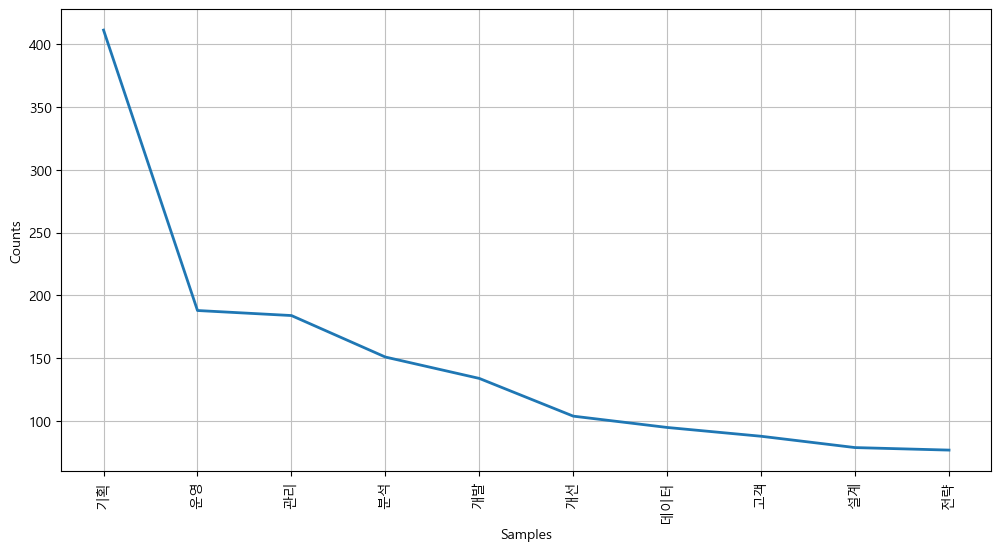

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

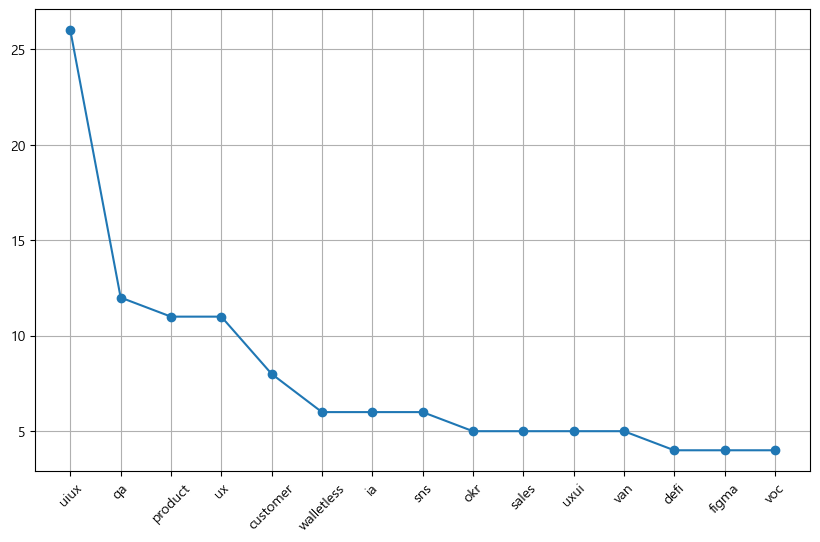

In [11]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)